# **Introduction**
---

## **Understanding What Factors Contribute to housing prices in California (Machine Learning Project)**
&ensp;Figuring out what factors contribute to housing prices in California is like unraveling a puzzle with many pieces. In this Google Colab project, I dive into the factors that influence the cost of homes across the California. Armed with tools like pandas for handling data, seaborn and matplotlib for visualizations, and scikit-learn for machine learning, I embark on a journey to uncover the secrets behind California's housing market.
<br>
<br>
&ensp;**My goal is straightforward:** to develop a predictive model for house prices based on various external factors such as population density within a block, median household income, and other factors provided in the dataset. Initially, the dataset will be filtered and analyzed, then the optimal forecasting model for housing cost will be chosen based on r-squared value to predict the cost of my dream house.
<br>
<br>
&ensp;Throughout the project, I will employ a range of visualization techniques, including scatterplot matrices and correlation heatmaps, to gain deeper insights into the dataset's trends. This analytical process will illuminate the relationships between different variables and their influence on housing prices. Additionally, I will explore the geographical distribution of housing costs, examining the impact of factors like proximity to the ocean.
<br>
<br>
&ensp;The insights I uncover will not just be numbers on a screen. They will provide useful information for anyone curious about California's housing market, whether they're real estate professionals or people like me who are in the market to buy a home. By understanding the factors that influence housing prices, I will be able to make informed decisions based on insights from this project when it comes to purchasing a house. Let's dive in and explore together!
<br>
<br>

The dataset used for analysis can be found [Here](https://drive.google.com/file/d/1N__oornPoxI-2KW420ecNkc8p2Bml7OC/view?usp=drive_link).

# **Setup / Basics**
---

### **Importing Libraries**

- This section imports necessary libraries such as pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization, and scikit-learn for machine learning algorithms.
- These libraries provide essential tools and functions needed for data analysis and modeling tasks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### **Reading the Data**
- Here, the dataset containing housing information is read from a CSV file using the pd.read_csv() function.
- The dataset is then stored in a pandas DataFrame named data, allowing for easy manipulation and analysis.
- Initial examination of the data using functions like data.describe() and data.info() provides insights into the dataset's structure, including the number of entries, data types, and any missing values.
<br>
<br>
- **Explanation of columns in the DataFrame:**
1. **longitude:** measures distance east or west of the prime meridian.
2. **latitude:** Measures the distance north or south of the equator.
3. **housing_median_age:** Median age of a house within a block; lower numbers indicate newer buildings.
4. **total_rooms:** Total number of rooms within a block.
5. **total_bedrooms:** Total number of bedrooms within a block.
6. **population:** Total number of people residing within a block.
7. **households:** Total number of households within a block.
8. **median_income:** Median income of households within a block. (scaled at 10k USD)
9. **median_house_value:** Median house value for households within a block (USD)
10. **ocean_proximity:** Categorical values representing proximity to the ocean.

In [ ]:
# Reading the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')

In [ ]:
#Overall view on the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Displaying basic information about the data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Displaying basic information about the data
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# Displaying basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# **Exploratory Data Analysis and Data Cleaning**
---


### **Overall Associations**
- The scatterplot matrix and histogram were created to visualize the relationships between different features in the dataset and examine their distributions. This allows for a comprehensive exploration of how variables interact with each other and whether any patterns or correlations exist among them.

<Figure size 640x480 with 0 Axes>

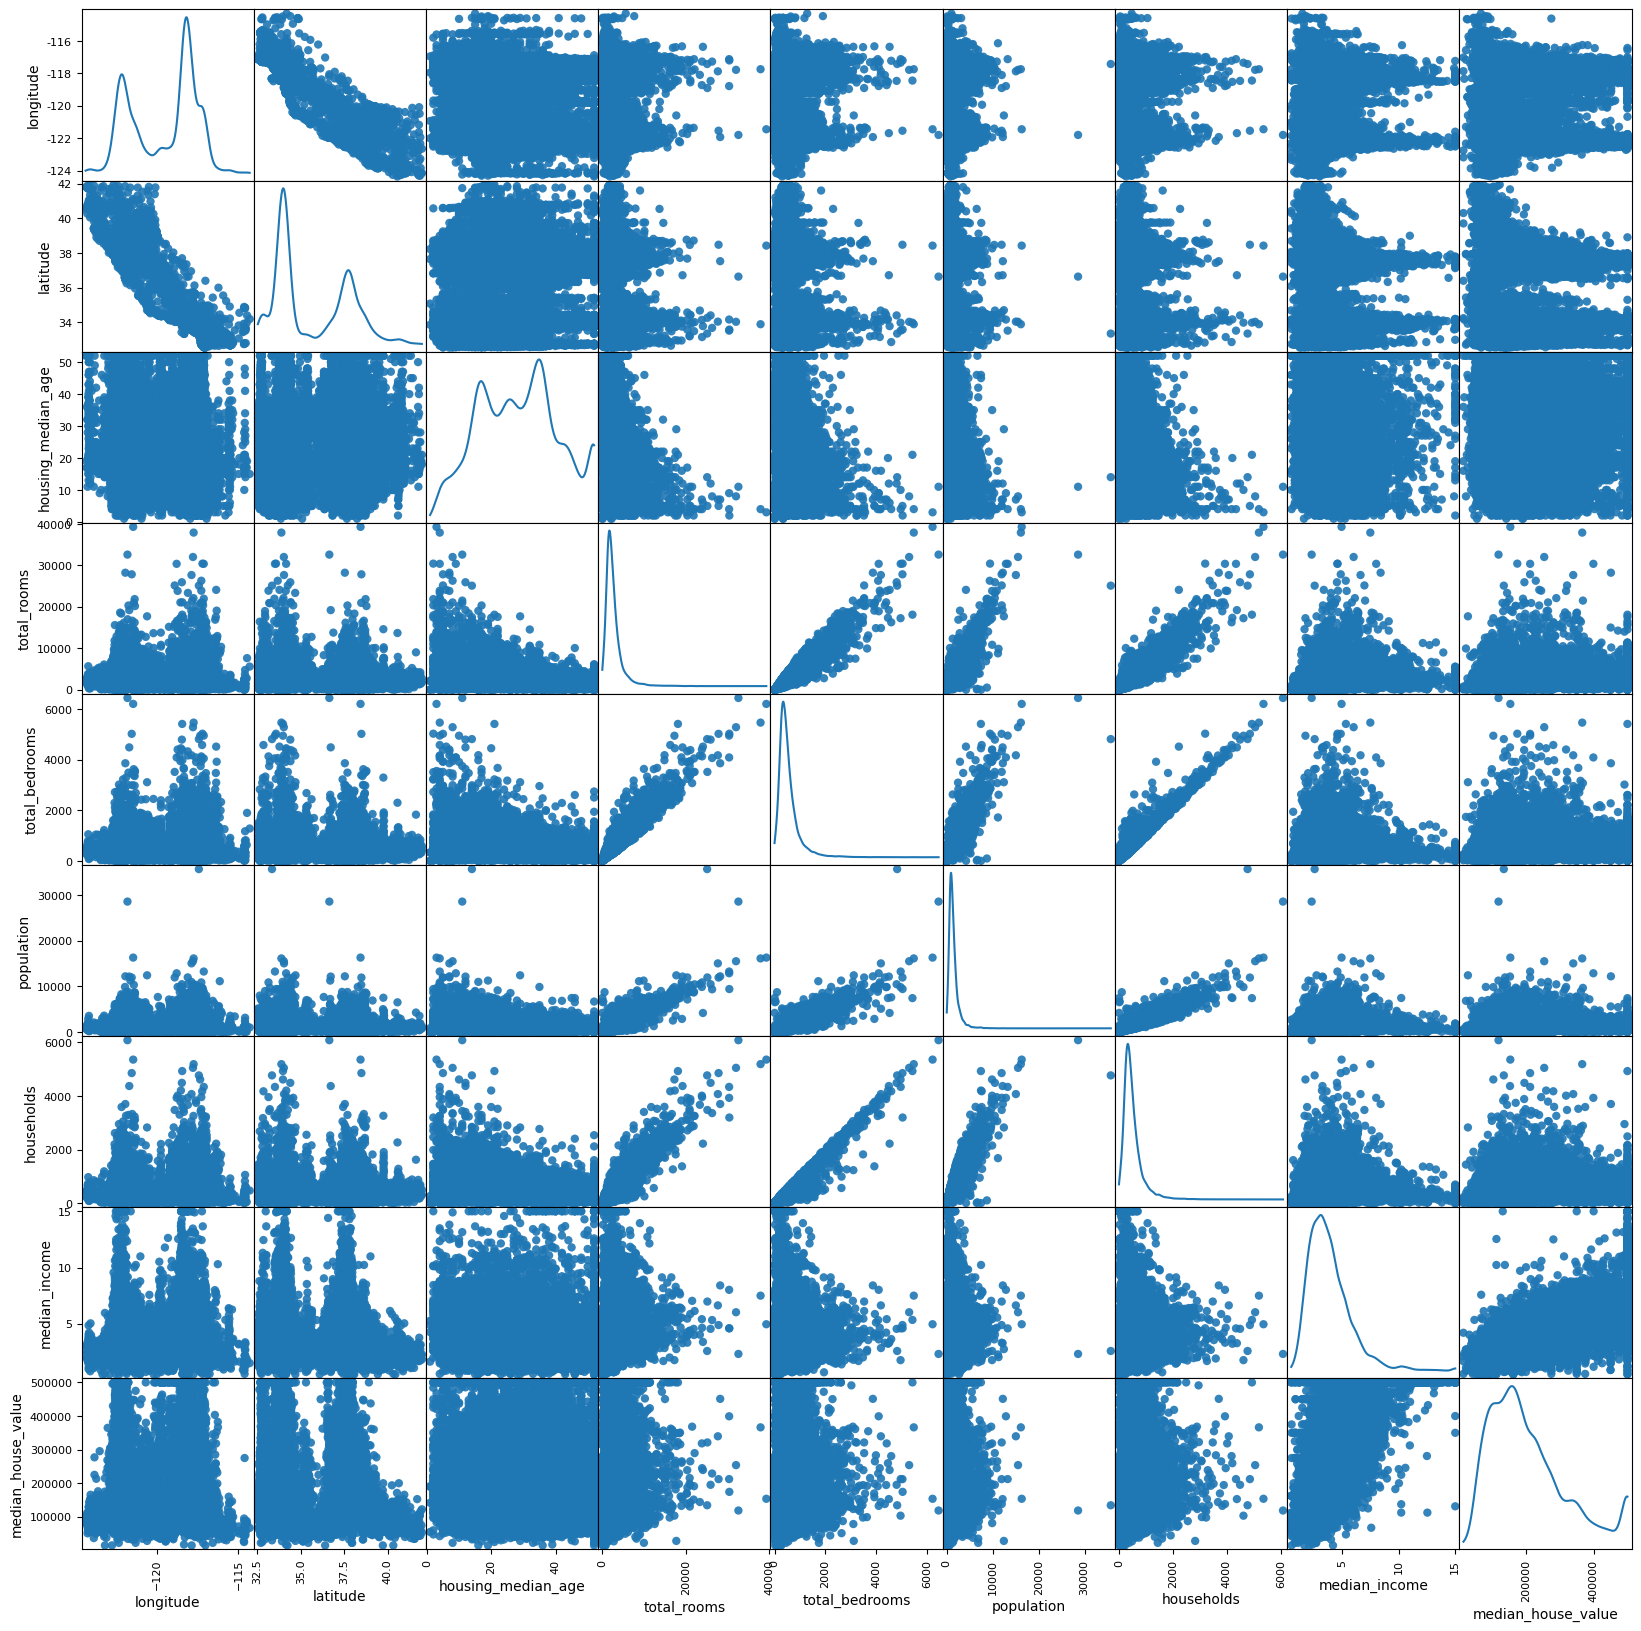

In [ ]:
#Displaying scatterplot matrix
fig = plt.figure()
scatter_matrix(frame = data,figsize =(20,20), alpha=0.9, diagonal="kde", marker="o");

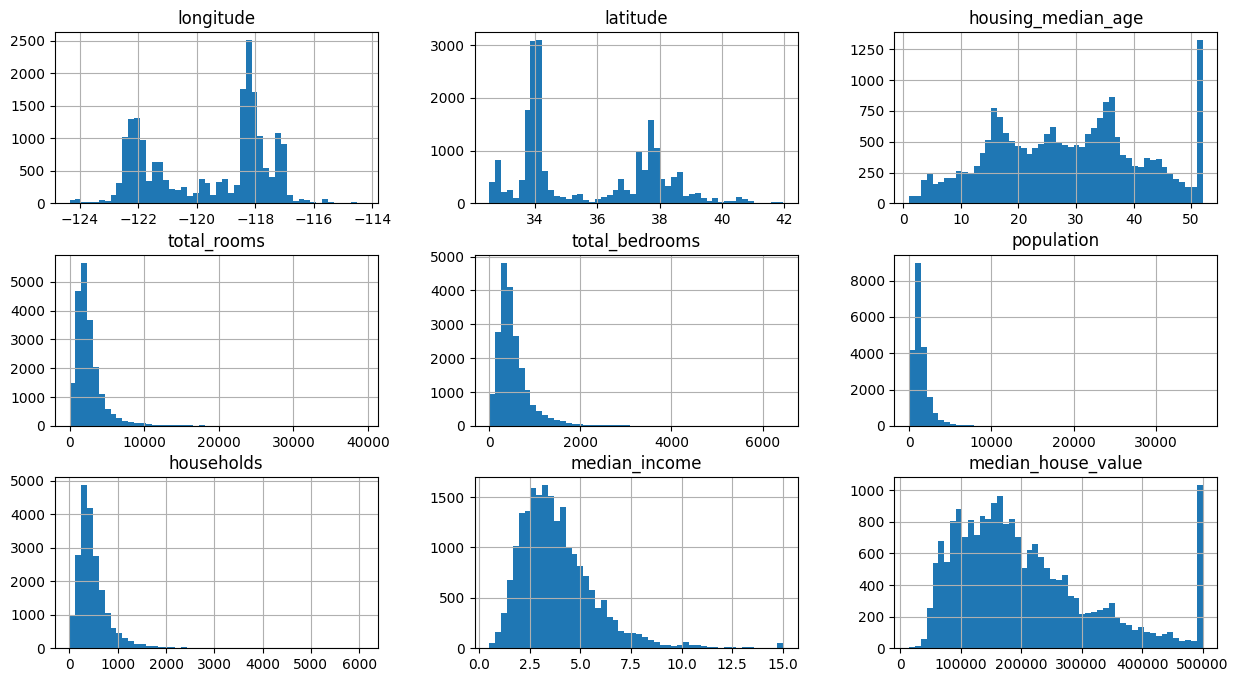

In [ ]:
# Displaying histograms for each feature
data.hist(figsize=(15,8),bins=50);

### **Removing Outliers**
- Outliers were removed from the dataset to ensure that they do not unduly influence the statistical analysis or modeling process. Outliers can skew the distribution of data and distort measures of central tendency and variability, potentially leading to inaccurate conclusions and predictions.
- By removing outliers, I aim to improve the robustness and reliability of our analysis, allowing for more accurate insights and modeling results that better represent the underlying patterns and relationships within the data.

In [ ]:
# Defining a function to remove outliers
def Outlier_Remove(dataframe, columns):
    outlierRemoved = dataframe.copy()

    for column in columns:
        if pd.api.types.is_numeric_dtype(outlierRemoved[column]):
            Q1 = outlierRemoved[column].quantile(0.25)
            Q3 = outlierRemoved[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR

            outliers = outlierRemoved[(outlierRemoved[column] < lower) | (outlierRemoved[column] > upper)]
            outlierRemoved = outlierRemoved[~outlierRemoved[column].isin(outliers[column])]
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")

    return outlierRemoved

#Application
data_filtered = Outlier_Remove(data, data.columns)


Skipping column 'ocean_proximity' as it is non-numeric.


In [ ]:
housing = data_filtered

### **Replacing missing values**
- After removing outliers from the dataset, further exploration revealed the presence of missing values in the 'total_bedrooms' column. To address this issue, the missing values were imputed by replacing them with the mode of the distribution, which represents the most frequently occurring value in the dataset.

<Axes: xlabel='total_bedrooms', ylabel='Count'>

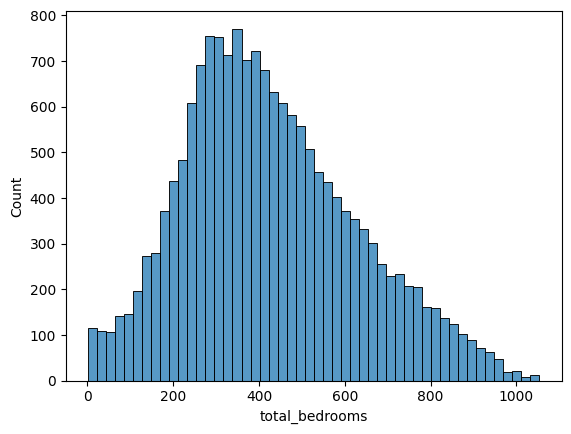

In [ ]:
#Histogram of total_bedrooms column , which is the only column with missing value.
sns.histplot(data = housing , x = 'total_bedrooms')

In [ ]:
# Replacing missing values in 'total_bedrooms' column with the mode
total_bedrooms_median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(total_bedrooms_median)
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### **Feature Engineering**
- Here, the categorical variable 'ocean_proximity' is encoded using pd.get_dummies. This transformation converts categorical data into numerical values (True/False) suitable for modeling. The original column is replaced with dummy variables representing each category, allowing the inclusion of this feature in regression models.

In [ ]:
# Encoding categorical variable 'ocean_proximity' using one-hot encoding
housing = housing.join(pd.get_dummies(housing['ocean_proximity']))

In [ ]:
housing.drop('ocean_proximity', axis = 1 , inplace = True)

In [ ]:
# Updated DataFrame
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,False,True,False


### **Correlation Heatmap**
- In this section, a correlation heatmap is created to visualize the pairwise correlation coefficients between different features in the dataset.
- The heatmap provides a color-coded representation of correlation values, allowing for quick identification of strong positive or negative correlations between variables.

<Axes: >

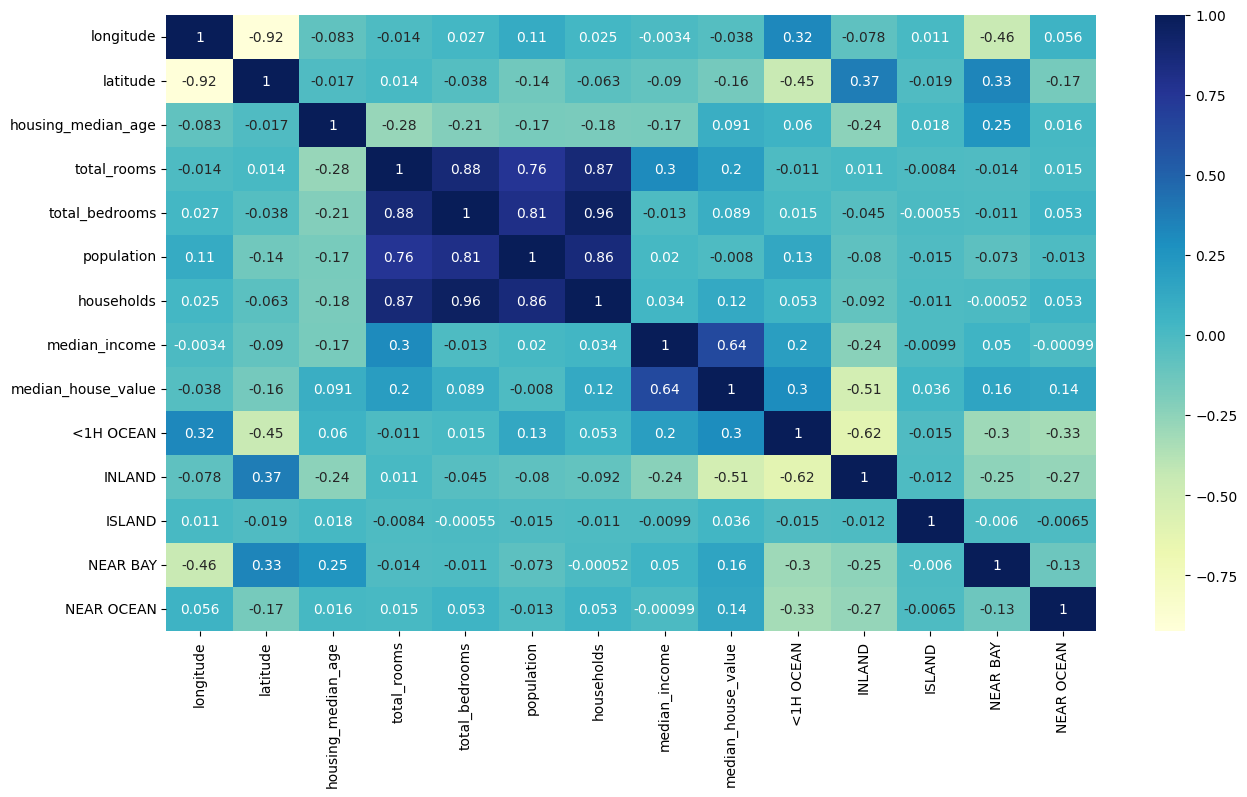

In [ ]:
# Creating a correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr() , annot = True , cmap = 'YlGnBu')

### **Geographical Scatterplot**
- A scatterplot is created to visualize the geographical distribution of median house values based on latitude and longitude coordinates. Each point on the scatterplot represents a location in the dataset, with the color of the points indicating the corresponding median house value.
- Based on the visualization, we can conclude that there is a significant association between ocean proximity and house value. Specifically, properties located near the ocean tend to have higher median house values compared to those further inland.

<Axes: xlabel='latitude', ylabel='longitude'>

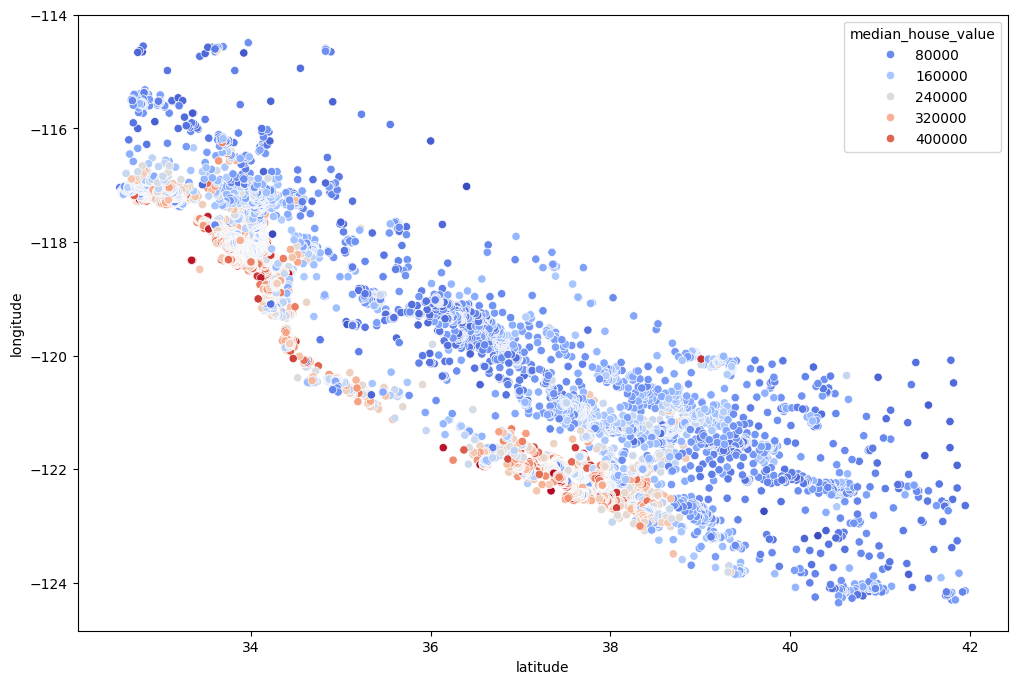

In [ ]:
# Creating a geographical scatterplot
plt.figure(figsize = (12,8))
sns.scatterplot(x='latitude' , y='longitude', data = housing, hue= 'median_house_value' , palette = 'coolwarm')

# **Modeling Preprocessing**
---

### **Dataset Splitting**
- This section focuses on preparing the data for modeling by splitting it into training and testing sets.
- The train_test_split() function from scikit-learn is used to divide the data.

In [ ]:
# Splitting the dataset into training and testing sets (80%, 20%)
from sklearn.model_selection import train_test_split

X = housing.drop(['median_house_value'], axis = 1)
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

### **Scaling Features**
- The StandardScaler is applied to scale the features (independent variables), ensuring that all features have a similar scale.
- Feature scaling ensures that all features contribute equally to the analysis and modeling process. Without scaling, features with larger magnitudes may disproportionately influence the outcome of the analysis or model fitting, leading to biased results.

In [ ]:
# Scaling features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression Modeling**
---

### **Explanation of the model**

&ensp; In the linear regression modeling section, a statistical technique called linear regression is employed to understand the relationship between the independent variables (such as longitude, latitude, housing median age, etc.) and the dependent variable (median house value). The model aims to find the best-fitting linear equation that predicts the median house value based on the given features. Coefficients associated with each feature represent the change in the dependent variable for a one-unit change in the respective independent variable, holding other variables constant. After training the model, its performance is evaluated using two metrics: root mean squared error (RMSE), which measures the average deviation of predicted values from actual values, and r-squared value, which indicates the proportion of variance in the dependent variable explained by the independent variables.

### **Fitting the training set**

In [ ]:
# Fitting the linear regression model to the training set
from sklearn.linear_model import LinearRegression

linearRegModel = LinearRegression(n_jobs = -1)
linearRegModel.fit(X_train, y_train)
cdf = pd.DataFrame(linearRegModel.coef_, housing.drop('median_house_value', axis = 1).columns, columns = ['Coefficient'])
print(cdf)
print("Intercept is : " + str(linearRegModel.intercept_))

                     Coefficient
longitude          -49918.978943
latitude           -51164.468067
housing_median_age   9916.843687
total_rooms        -10182.214194
total_bedrooms      27146.422977
population         -36982.278332
households          22152.902867
median_income       54382.342251
<1H OCEAN            7548.238701
INLAND             -10804.925498
ISLAND               2670.580338
NEAR BAY              984.168156
NEAR OCEAN           3161.762719
Intercept is : 185003.64588418003


### **Running the model on testing set**

In [ ]:
# Running the linear regression model on the testing set
y_pred = linearRegModel.predict(X_test)
print(len(y_pred))
print(len(y_test))
print(list((y_pred[:10]).round()))
print(list(y_test[0:10]))

3381
3381
[193492.0, 203267.0, 170262.0, 171653.0, 203813.0, 149553.0, 260820.0, 191283.0, 195993.0, 177453.0]
[160000.0, 106300.0, 153500.0, 166700.0, 178000.0, 142800.0, 257400.0, 307600.0, 140500.0, 162000.0]


### **Visualization**

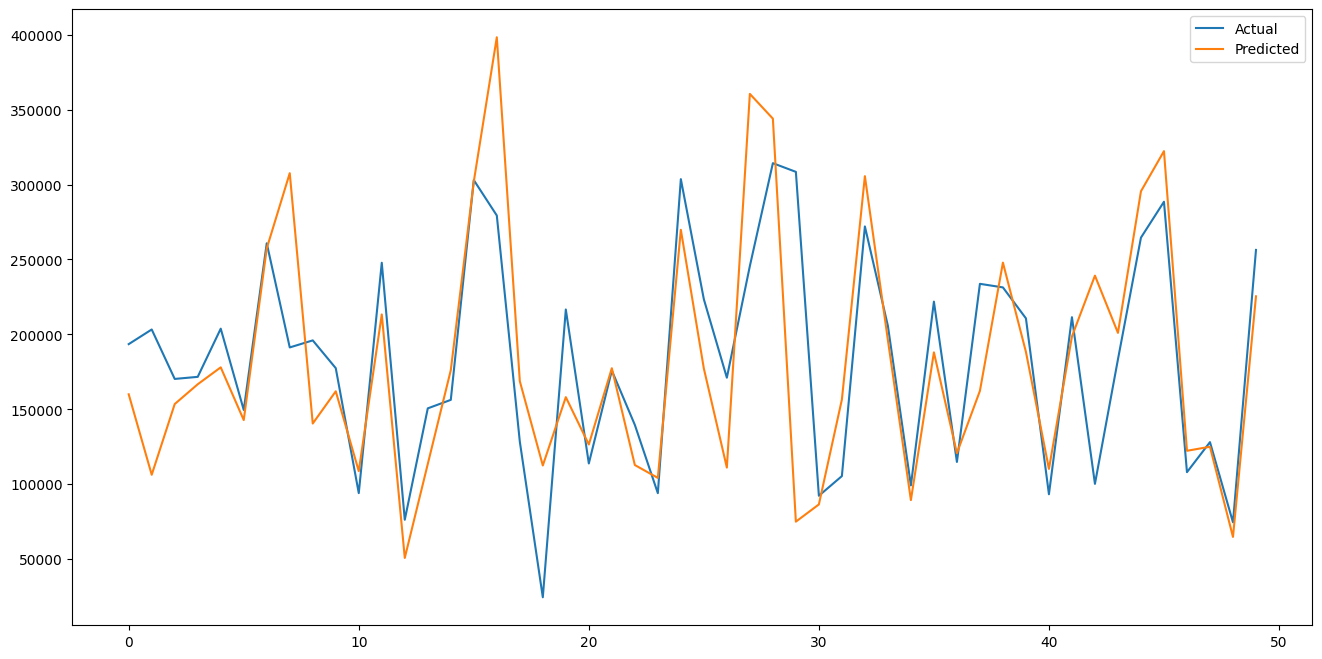

In [ ]:
# Visualization of the linear regression model
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

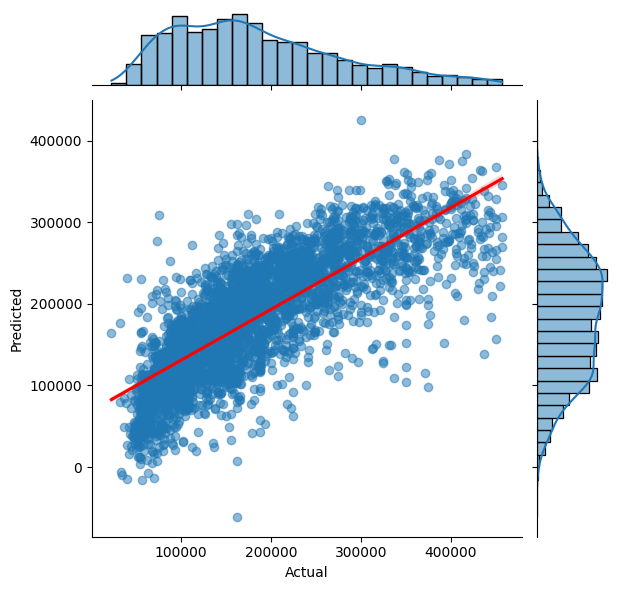

In [ ]:
# Visualization of the linear regression model
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg' , scatter_kws={'alpha': 0.5}, joint_kws={'line_kws':{'color':'red'}})

### **Evaluation of the model**

In [ ]:
# Evaluation of the linear regression model's RMSE, and r-squared
print('Root Mean Squared Error is : ' + str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('r-squared value (score) is: ' + str(linearRegModel.score(X_test, y_test)))

Root Mean Squared Error is : 58033.591192210435
r-squared value (score) is: 0.6168622571525978


# **Random Forest Regression Modeling**
---

### **Explanation of the model**

&ensp; Random forest regression modeling utilizes an ensemble learning technique known as random forests. Unlike linear regression, which builds a single equation, random forests construct multiple decision trees during training. Each tree is trained on a random subset of the data and features, and the final prediction is made by averaging the predictions of all trees. This approach typically results in better predictive performance and robustness against overfitting compared to a single decision tree. After fitting the random forest regression model to the training data, its performance is evaluated using the same metrics as the linear regression model: RMSE and r-squared value.

### **Fitting the training set**

In [ ]:
# Fitting the random forest regression model to the training set
rfRegModel = RandomForestRegressor(150)
rfRegModel.fit(X_train , y_train)

RandomForestRegressor(n_estimators=150)

### **Running the model on testing set**

In [ ]:
# Running the random forest regression model on the testing set
rfRegModel_y_pred = rfRegModel.predict(X_test)
print(len(y_pred))
print(len(y_test))
print(list((y_pred[:10]).round()))
print(list(y_test[0:10]))

3381
3381
[193492.0, 203267.0, 170262.0, 171653.0, 203813.0, 149553.0, 260820.0, 191283.0, 195993.0, 177453.0]
[160000.0, 106300.0, 153500.0, 166700.0, 178000.0, 142800.0, 257400.0, 307600.0, 140500.0, 162000.0]


### **Visualization**

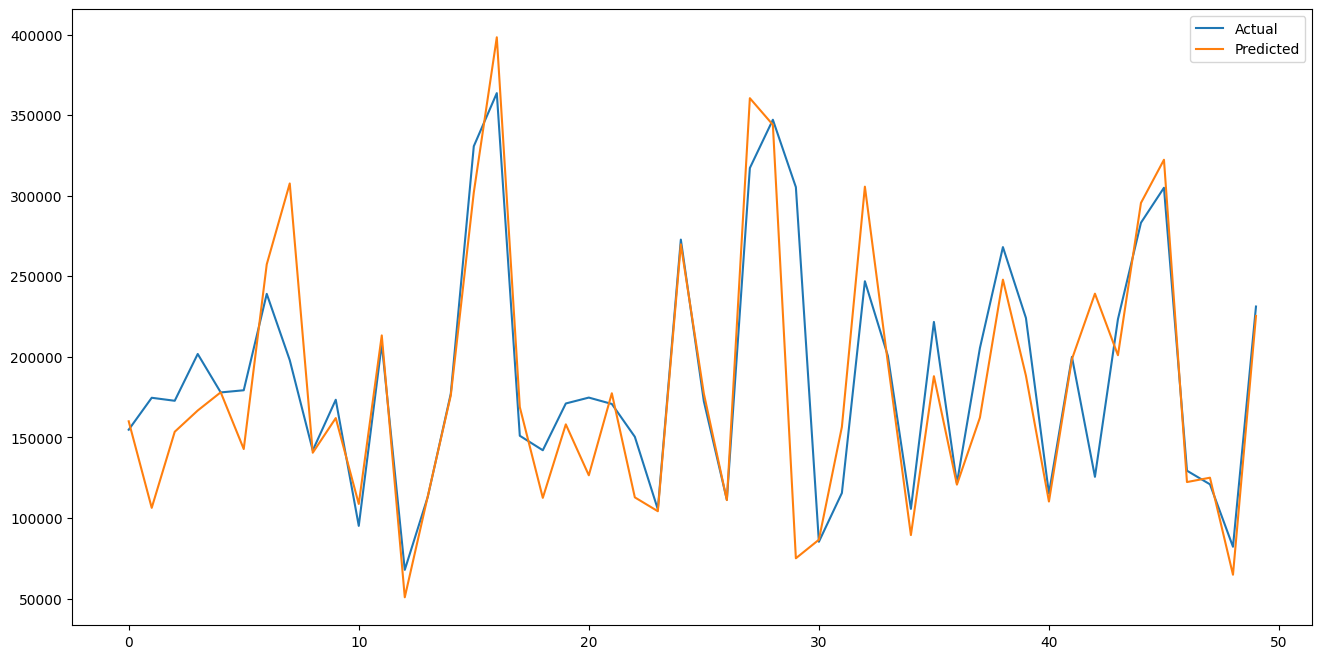

In [ ]:
# Visualization of the random forest regression model
test2 = pd.DataFrame({'Predicted':rfRegModel_y_pred,'Actual':y_test})

fig= plt.figure(figsize=(16,8))
test2 = test2.reset_index()
test2 = test2.drop(['index'],axis=1)
plt.plot(test2[:50])
plt.legend(['Actual','Predicted'])

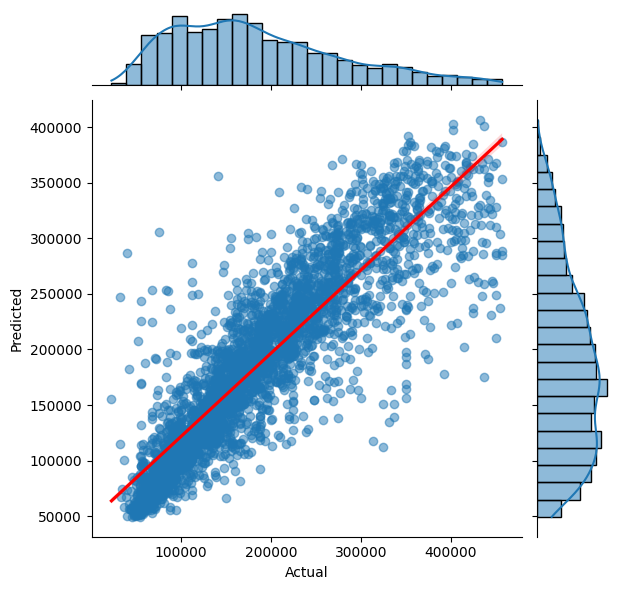

In [ ]:
# Visualization of the random forest regression model
sns.jointplot(x='Actual', y='Predicted' , data=test2 , kind='reg' , scatter_kws={'alpha': 0.5} , joint_kws={'line_kws':{'color':'red'}})

### **Evaluation of the model**

In [ ]:
# Evaluation of the random forest regression model
print('Root Mean Squared Error is : ' + str(np.sqrt(metrics.mean_squared_error(y_test,rfRegModel_y_pred))))
print('R-squared value (score) is: ' + str(rfRegModel.score(X_test, y_test)))

Root Mean Squared Error is : 44429.41261354679
R-squared value (score) is: 0.775437524361188


### **Hyperparameter Tuning**
In this section, a technique called grid search cross-validation is employed to systematically search through a specified grid of hyperparameters and evaluate the model's performance using cross-validation. The goal is to identify the hyperparameter values that result in the best model performance, as measured by a chosen evaluation metric, such as mean squared error. The model with the best-performing hyperparameters is then selected for further use.

In [ ]:
# Setting up hyperparameter grid for random forest regressor
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,500] ,  # Vary the number of trees
    'max_depth': [None , 2] ,  # Explore different maximum depths
    'min_samples_split': [2,4]  # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(forest, param_grid, cv= 5, scoring = 'neg_mean_squared_error' , return_train_score = True , n_jobs = -1 )
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Evaluating Optimized Model after hyperparameter tuning
optimized_model = grid_search.best_estimator_
print('Root Mean Squared Error is : ' + str(np.sqrt(metrics.mean_squared_error(y_test,optimized_model.predict(X_test)))))
print('R-squared value (score) is: ' + str(optimized_model.score(X_test, y_test)))

Root Mean Squared Error is : 44503.473869885696
R-squared value (score) is: 0.7746882351014011


# **Predicting cost of my Dream House**
---


**My Dream House Criteria**
<br>
<br>
1. **Longitude / Latitude**: My dream house should be located in Fremont, California, renowned for its picturesque landscapes and vibrant community.
   
2. **Median age of buildings**: I envision the neighborhood to feature buildings with a median age of around 20 years, striking a harmonious blend of modern conveniences and established infrastructure.

3. **Total rooms**: Within the block, there should be a total of 1000 rooms, ensuring ample living space for residents to enjoy.

4. **Total bedrooms**: Ideally, there would be approximately 100 bedrooms within the block, indicative of spacious housing.

5. **Population**: I find a population of around 500 within the block to be ideal, fostering a sense of community while maintaining a comfortable living environment.

6. **Households**: With approximately 150 households nearby, each household would have an average of 6 to 7 rooms, also portraying large houses.

7. **Median Income**: The median income for households in the area is set at $120,000 per year, reflecting financial stability and prosperity within the community.

8. **Near Bay**: Given Fremont's proximity to the bay, my dream location falls within the "Near Bay" category.

In [ ]:
# Defining criteria for dream house
my_dream_house = [37.55, 121.99, 20.0, 1000.0, 100.0, 500.0, 150.0, 12.0, False, False, False, True, False]
# Reshaping to 2-D array
my_dream_house_array = np.array(my_dream_house).reshape(1, -1)
# Predicting house price for dream house using random forest regressor model
optimized_model_my_dream_house = optimized_model.predict(my_dream_house_array)

print("Using optimized model, predicted house price for my dream house is " + str(optimized_model_my_dream_house.round())[1:-2] + " US Dollars")

Using optimized model, predicted house price for my dream house is 362583 US Dollars


**Thoughts**
- Despite anticipating a considerable cost to acquire my dream house that meets the specified criteria above, the actual price of approximately 360,000 US Dollars surpasses my initial expectation of 200,000 US Dollars by a significant margin.

# **Conclusions**
---

&nbsp;&nbsp;&nbsp;&nbsp; Throughout this project, my objective was to develop accurate models for predicting house prices based on various features. The analysis involved extensive data preprocessing, exploration, and modeling, which provided valuable insights into the predictive capabilities of different regression algorithms. After thorough data cleaning, including handling missing values and removing outliers, I split the dataset into training and testing sets. Subsequently, I trained two regression models: Linear Regression and Random Forest Regressor.
<br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;The evaluation revealed that the Random Forest Regressor significantly outperformed the Linear Regression model in terms of predictive accuracy. With a lower Root Mean Squared Error (RMSE) and a higher R-squared score on the testing set, the Random Forest Regressor demonstrated its superior ability to capture the complex relationships present in the data.
<br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;Visualizations such as scatterplots and joint plots provided additional insights into the models' performance, enabling me to visualize the relationships between actual and predicted house prices. After reviewing these visualizations, I began hyperparameter tuning on the Random Forest Regression model to find the final optimized model - **with final prediction score (r-squared value) of approximately 0.8.**
<br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;Furthermore, considering my personal preferences for the ideal house, I discovered that despite anticipating a considerable cost to acquire a dream house meeting specific criteria—such as being located in Fremont, California, featuring a median age of buildings around 20 years, and offering amenities like 1000 rooms and 100 bedrooms—the actual price of ~360,000 USD surpassed my initial expectations by a significant margin. This insight informed me that acquiring such a dream house would require substantially more funds than I initially estimated.
<br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;In conclusion, this project underscores the importance of data preprocessing, model selection, hyperparameter tuning, and thorough evaluation in building effective predictive models. Moving forward, further refinement of feature engineering techniques and exploration of advanced regression algorithms could potentially enhance the models' performance and accuracy in predicting house prices in California.

